## Exploratory Data *Analysis*

Exploratory Data Analysis (EDA) is a method used to analyze and summarize datasets. Majority of the EDA techniques involve the use of graphs.

Titanic Dataset – 
It is one of the most popular datasets used for understanding machine learning basics. It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked. This dataset can be used to predict whether a given passenger survived or not.

### Importing necessary libraries

In [1]:
#IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The datasets

In [2]:
#LOADING THE FILE 

with open("./titanic_train.csv") as file:
    train = pd.read_csv(file)
    

In [42]:
train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [4]:
#PRINTING DETAILS ABOUT OUR DATASET

print(train.columns)
print(train.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)


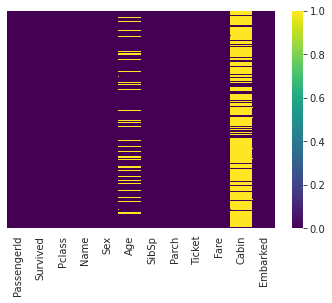

In [5]:
# CHECK FOR NAN VALUES AND MISSING VALUES

# train.isnull() -- resource heavy technique

#VISUALIZING MISSING VALUES USING HEATMAP

sns.set_style('whitegrid')
sns.heatmap(train.isnull(), yticklabels = False, cmap = 'viridis')

### #VISUALIZING HOW MANY SURVIVED AND HOW MANY DID NOT BASED ON VARIOUS FEATURES

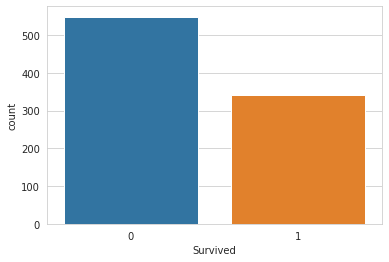

In [6]:


sns.set_style('whitegrid')
sns.countplot(data = train, x = 'Survived')

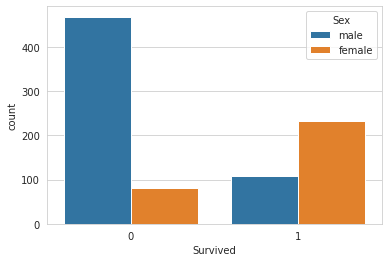

In [7]:
sns.countplot(data = train, x = 'Survived', hue='Sex')

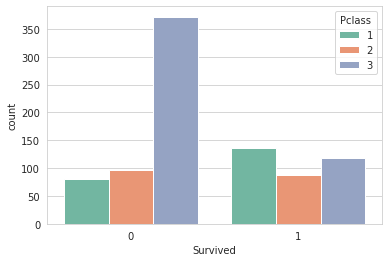

In [8]:
sns.countplot(data=train,x='Survived',hue='Pclass',palette='Set2')

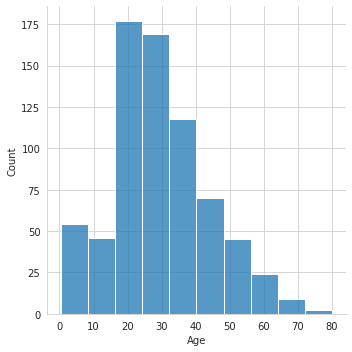

In [9]:
sns.displot(data=train['Age'].dropna(),kde=False,bins=10)

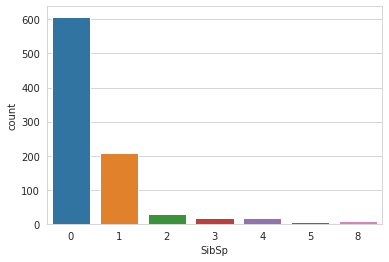

In [10]:
sns.countplot(x='SibSp', data=train)

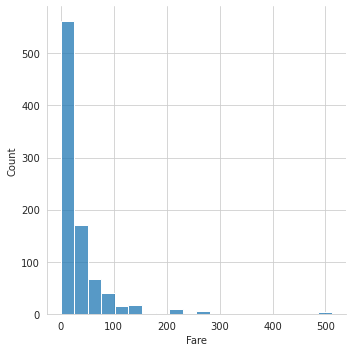

In [11]:
sns.displot(x='Fare',data=train,kde=False,bins=20)

### Data Cleaning
- We want to fill in the missing age data instead of just removing the rows containing missing values,one way to fill the missing values is to repalce the missing values with the mean age, However we can be smarter about this and fill in the mean base on the passenger class.

### Handling Age

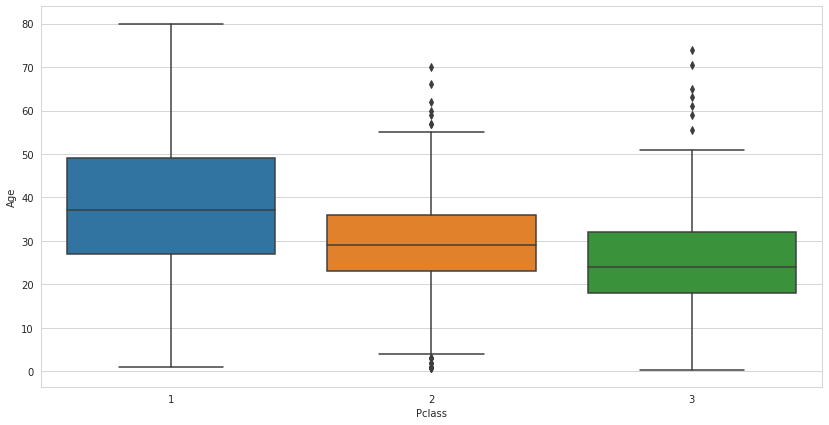

In [12]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

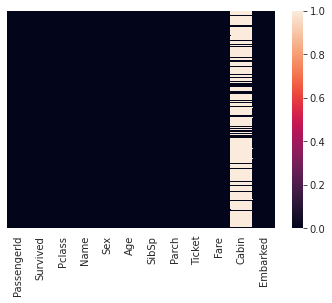

In [15]:
sns.heatmap(data=train.isnull(), yticklabels=False)

### We have filled the age column, Filling values in Cabin column is difficult since it has a lot of NaN values, hence we drop the column.

In [16]:
train.drop('Cabin',axis=1,inplace = True)

In [17]:
train.dropna(inplace=True)

### We will need to convert the categorical features into dummy values in pandas, otherwise our Algorithm won't be able to take the feature as input (Three categories in embark and two categories in sex column.)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
#CONVERTING CATEGORICAL FEATURES INTO NUMBERICAL FEATURES AND REDUCING ITS DIMESNSIONS

embark = pd.get_dummies(train['Embarked'],drop_first=True)
sex = pd.get_dummies(train['Sex'],drop_first =  True)

In [20]:
#DROPPING THE COLUMNS NOW

train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [43]:
 train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Now our dataframe is free from categorical features.

In [44]:
#APPENDING THE NEW CONVERTED COLUMNS TO OUR DATAFRAME

train = pd.concat([train,sex,embark],axis=1)

In [45]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,1


Now,our data is ready for the model.

In [35]:
#INPUT(X)

train.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [36]:
#OUTPUT(Y) 

train['Survived'].head()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#SPLTTING OUR DATASET INTO TRAINING AND TESTING (70% WILL BE USED FOR TRAINING AND REST OF THE DATA FOR TESTSING)

x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3,random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()
model.fit(x_train,y_train)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
predictions = model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [46]:
#PRINTING CONFUSION MATRIX

accuracy= confusion_matrix(y_test,predictions) 
accuracy

In [41]:
#PRINTING THE ACCURACY SCORE

accuracy_sccore = accuracy_score(y_test,predictions)*100
str(accuracy_sccore) + " %"

'82.77153558052434 %'

In [37]:
#PREDICTING BY GIVING FEW INPUT FEATURES

model.predict([[3,20,1,0,71,0,0,1]])

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
